In [1]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [2]:
def _dist(p,q):
    # compute and return the euclidean distance
    square=np.multiply(p-q,p-q)
    distance=np.power(square[0]+square[1],0.5)
    return distance

In [3]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    mask=_dist(p,q) < eps
    return mask

In [4]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    for i in range(n_points):
        if _eps_neighborhood(point_id,m,eps)[0,i]==True:
            seeds.append(i)
    return seeds

In [21]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    p=m[[0,1],[point_id,point_id]].transpose()
    group=_region_query(m,p, eps)
    if len(group) >= min_points:
        for i in group:
            sub_group=_region_query(m,m[[0,1],[i,i]].transpose(), eps)
            if len(sub_group) >= min_points:
                for j in sub_group:
                    if j not in group:
                        group.append(j)
        for j in group:
            classifications[j]=cluster_id
    return classifications

In [22]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    for i in range(n_points):
        if classifications[i]==False:
            classifications=_expand_cluster(m, classifications, i, cluster_id, eps, min_points)
            cluster_id += 1
    for i in range(len(classifications)):
        if classifications[i] == False:
            classifications[i] = NOISE
    return classifications

In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

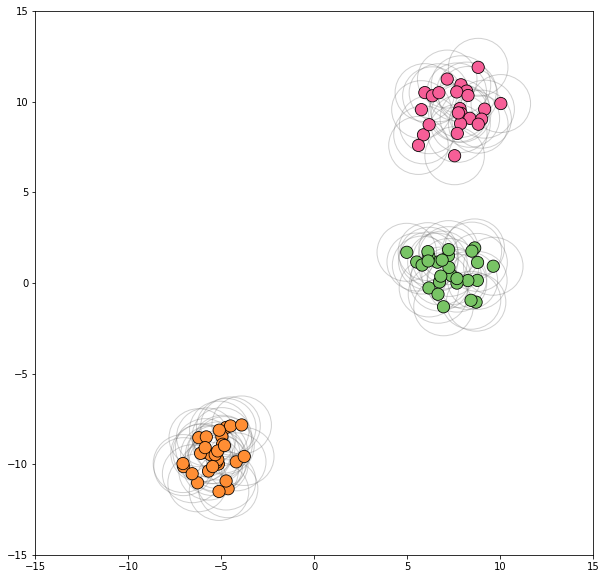

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [18]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [19]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

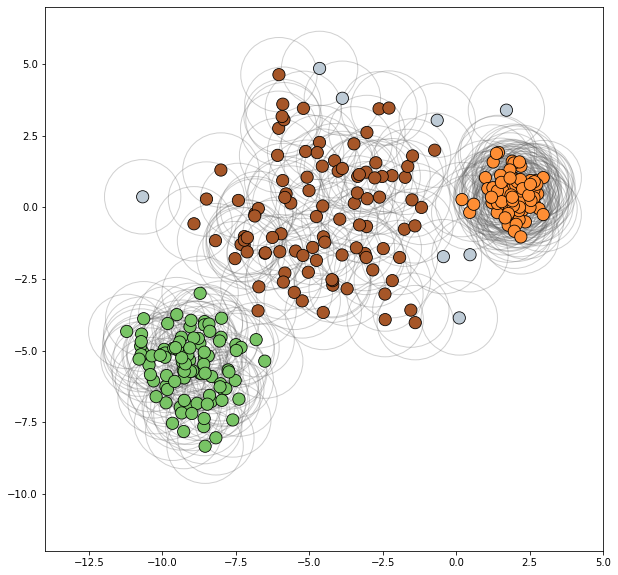

In [23]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
